In [1]:
! pip install bidict

In [2]:
import pandas as pd 
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from bidict import bidict

---
Multi-attention Multi-class model

In [3]:
pred1_df = pd.read_csv('../data/mca_attn_model.csv')
pred1_df.head()

,filename,label,target,probs
0,glide_text2img_annot000000037890.png,0,glide,"[0.2796, 0.2148, 0.1216, 0.0031, 0.1075, 0.271..."
1,glide_text2img_annot000000056987.png,0,glide,"[8.1739e-01, 1.0349e-01, 3.6734e-02, 2.7591e-0..."
2,glide_text2img_annot000000038422.png,0,glide,"[0.5666, 0.0295, 0.1580, 0.0013, 0.1763, 0.065..."
3,glide_text2img_annot000000039530.png,0,glide,"[8.5409e-01, 5.4093e-02, 5.5377e-02, 6.1008e-0..."
4,glide_text2img_annot000000052051.png,0,glide,"[7.6734e-01, 9.6568e-03, 9.2751e-02, 1.3281e-0..."


In [4]:
tag_dict = {'glide': 0,
            'gated': 1,
            'Taming': 2,
            'stylegan3': 3,
            'stylegan2': 4,
            'coco_standard': 5,
            'realffhq': 6}
tag_dict = bidict(tag_dict)

In [5]:
method_map = {
    'glide': 'Synth',
    'gated': 'Synth',
    'Taming': 'Synth',
    'stylegan3': 'Synth',
    'stylegan2': 'Synth',
    'coco_standard': 'Real',
    'realffhq': 'Real'
    }

In [6]:
pred1_df['pred_tag_text'] = pred1_df['label'].map(tag_dict.inverse)
pred1_df['target_ind'] = pred1_df['target'].map(tag_dict)
pred1_df['origin_pred'] = pred1_df['pred_tag_text'].map(method_map)
pred1_df['origin_target'] = pred1_df['target'].map(method_map)
pred1_df['probs'] = pred1_df['probs'].apply(lambda x: eval(x))
pred1_df.head()

,filename,label,target,probs,pred_tag_text,target_ind,origin_pred,origin_target
0,glide_text2img_annot000000037890.png,0,glide,"[0.2796, 0.2148, 0.1216, 0.0031, 0.1075, 0.271...",glide,0,Synth,Synth
1,glide_text2img_annot000000056987.png,0,glide,"[0.81739, 0.10349, 0.036734, 0.00027591, 0.015...",glide,0,Synth,Synth
2,glide_text2img_annot000000038422.png,0,glide,"[0.5666, 0.0295, 0.158, 0.0013, 0.1763, 0.0657...",glide,0,Synth,Synth
3,glide_text2img_annot000000039530.png,0,glide,"[0.85409, 0.054093, 0.055377, 0.00061008, 0.01...",glide,0,Synth,Synth
4,glide_text2img_annot000000052051.png,0,glide,"[0.76734, 0.0096568, 0.092751, 0.0013281, 0.09...",glide,0,Synth,Synth


In [7]:
origin_map = {
    'Synth': 1,
    'Real': 0
}

pred1_df['origin_pred_ind'] = pred1_df['origin_pred'].map(origin_map)
pred1_df['origin_target_ind'] = pred1_df['origin_target'].map(origin_map)
pred1_df.head()

,filename,label,target,probs,pred_tag_text,target_ind,origin_pred,origin_target,origin_pred_ind,origin_target_ind
0,glide_text2img_annot000000037890.png,0,glide,"[0.2796, 0.2148, 0.1216, 0.0031, 0.1075, 0.271...",glide,0,Synth,Synth,1,1
1,glide_text2img_annot000000056987.png,0,glide,"[0.81739, 0.10349, 0.036734, 0.00027591, 0.015...",glide,0,Synth,Synth,1,1
2,glide_text2img_annot000000038422.png,0,glide,"[0.5666, 0.0295, 0.158, 0.0013, 0.1763, 0.0657...",glide,0,Synth,Synth,1,1
3,glide_text2img_annot000000039530.png,0,glide,"[0.85409, 0.054093, 0.055377, 0.00061008, 0.01...",glide,0,Synth,Synth,1,1
4,glide_text2img_annot000000052051.png,0,glide,"[0.76734, 0.0096568, 0.092751, 0.0013281, 0.09...",glide,0,Synth,Synth,1,1


In [8]:
# multi-class result score
print(classification_report(y_true=pred1_df['target_ind'].values, y_pred=pred1_df['label'].values, target_names=list(tag_dict.keys())))

               precision    recall  f1-score   support

        glide       0.67      0.49      0.56       400
        gated       0.45      0.26      0.32       400
       Taming       0.57      0.24      0.34       699
    stylegan3       0.80      0.74      0.77       400
    stylegan2       0.85      0.54      0.66       400
coco_standard       0.73      0.94      0.82      1837
     realffhq       0.67      0.98      0.79       682

     accuracy                           0.70      4818
    macro avg       0.67      0.60      0.61      4818
 weighted avg       0.68      0.70      0.67      4818



In [9]:
# binary result score
print(classification_report(y_true=pred1_df['origin_target_ind'].values, y_pred=pred1_df['origin_pred_ind'].values, target_names=['Real', 'Synth']))

              precision    recall  f1-score   support

        Real       0.71      0.95      0.81      2519
       Synth       0.92      0.58      0.71      2299

    accuracy                           0.77      4818
   macro avg       0.82      0.76      0.76      4818
weighted avg       0.81      0.77      0.76      4818



In [10]:
sub_df = np.array([i for i in pred1_df.loc[pred1_df['target']=='glide', :]['probs'].values])
# print(sub_df)
avg_probs = np.mean(sub_df, axis=0)
print(avg_probs)

[0.40398599 0.15671358 0.12022748 0.01543729 0.04374766 0.25449541
 0.00539272]


Text(0.5, 1.0, 'Glide Avg. Prediction probability')

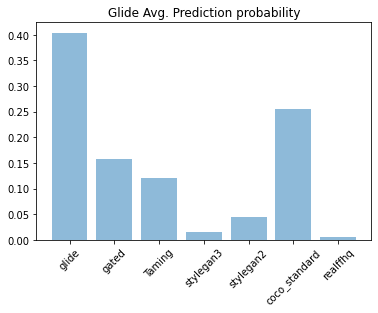

In [11]:
import matplotlib.pyplot as plt 
classes = list(tag_dict.keys())
plt.bar(classes, avg_probs, align='center', alpha=0.5)
plt.xticks(rotation=45)
plt.title("Glide Avg. Prediction probability")

Text(0.5, 1.0, 'Refined Confusion Matrix')

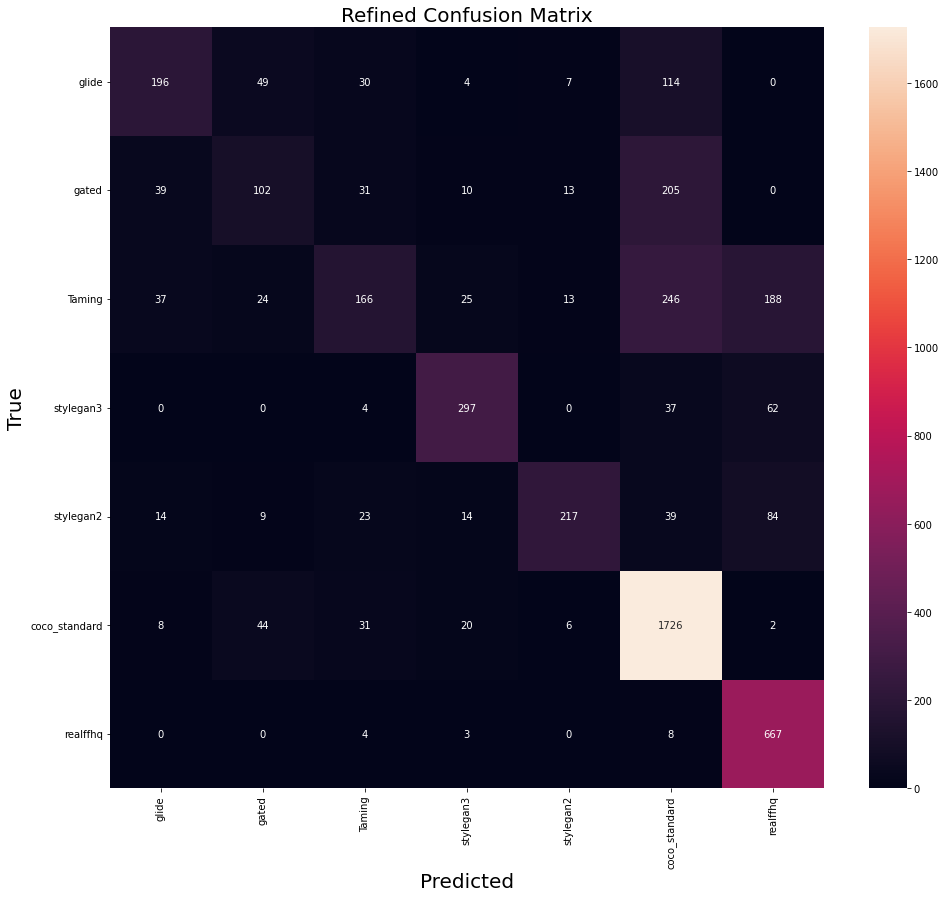

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = pred1_df['target_ind'].values 
y_pred = pred1_df['label'].values
cm = confusion_matrix(y_true, y_pred)

## Get Class Labels
class_names = classes

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)


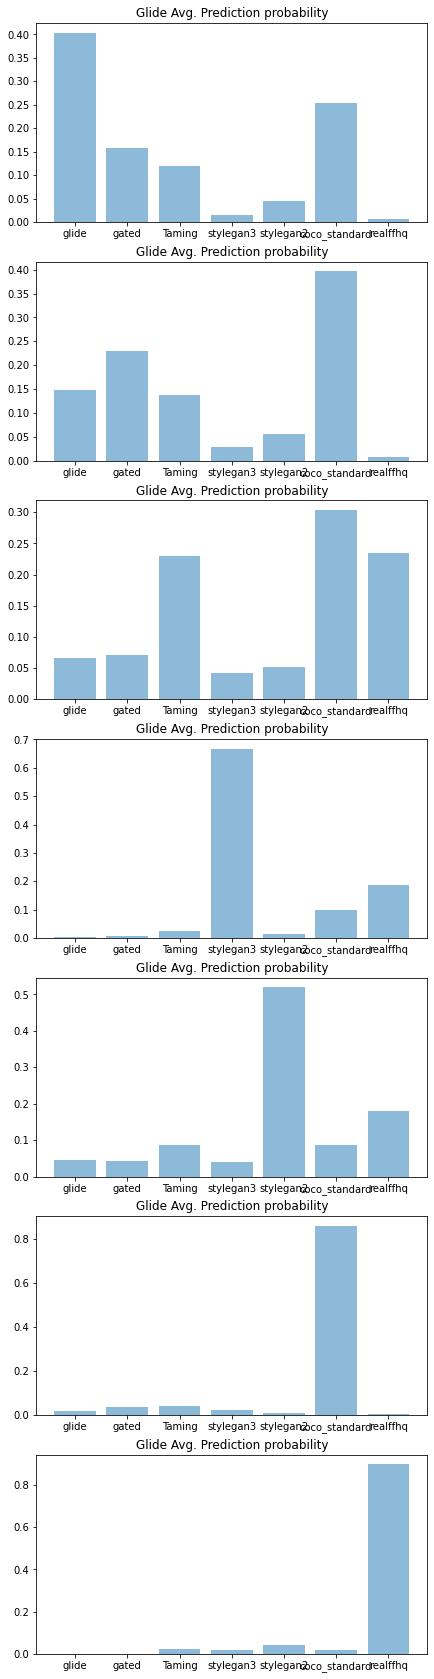

In [13]:
classes = list(tag_dict.keys())
fig, ax = plt.subplots(len(classes), 1, figsize=(7, 30))
for n,i in tag_dict.items():
    sub_df = np.array([i for i in pred1_df.loc[pred1_df['target']==n, :]['probs'].values])
    avg_probs = np.mean(sub_df, axis=0)
    axx = ax[i]
    axx.bar(classes, avg_probs, align='center', alpha=0.5)
    # axx.set_xticklabels(rotation=45)
    axx.set_title("Glide Avg. Prediction probability")

In [14]:
ones_ind = [0,1,2,3,4]
zeros_ind = [5,6]
prob_vector = np.array([i for i in pred1_df.loc[:, :]['probs'].values])
ones_prob = np.sum(prob_vector[:, ones_ind], axis=1)[..., np.newaxis]
zeros_prob = np.sum(prob_vector[:, zeros_ind], axis=1)[..., np.newaxis]
full_probs = np.hstack((zeros_prob, ones_prob))
pred_class = np.argmax(full_probs, axis=1)
pred_class.shape

(4818,)

In [15]:
print(classification_report(y_true=pred1_df['origin_target_ind'].values, y_pred=pred_class))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83      2519
           1       0.90      0.66      0.76      2299

    accuracy                           0.80      4818
   macro avg       0.82      0.79      0.79      4818
weighted avg       0.82      0.80      0.80      4818

